<a href="https://colab.research.google.com/github/Astrocitos/Advanced-ML-Practices/blob/main/TC4033_Activity2a_A01793080.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Lead Professor**

##Dr. Jose Antonio Cantoral-Ceballos



##**Asistant Professor**

##Dr. Carlos Villaseñor


##Astrid Rosario Bernaga Torres              A01793080

# Introduction: American Sign Language (ASL) Hand Sign Recognition

## Problem Statement

The American Sign Language (ASL) is a vital means of communication for individuals with hearing impairments. Recognizing ASL hand signs through computer vision and machine learning can open up new possibilities for bridging communication gaps. In this project, our goal is to develop a machine learning model that can accurately classify ASL hand signs based on images.

## ASL Dataset

We are working with the ASL dataset, which consists of grayscale images of hand signs representing letters of the alphabet (A-Z) and digits (0-9). Each image is 28x28 pixels, resulting in a total of 24 unique classes (A-Z excluding J and Z). The dataset has been divided into training and validation sets.

### Dataset Overview:

- Number of Classes: 24
- Image Size: 28x28 pixels
- Total Samples: Training Set (27,455 samples), Validation Set (7,172 samples)
- Labels: Each image is labeled with the corresponding ASL letter or digit.

## Goals of the Code

In this Jupyter Notebook, we aim to achieve the following goals:

1. Data Preprocessing: Prepare and preprocess the ASL dataset for model training. This includes data normalization, splitting into validation and test sets, and exploring the dataset.

2. Model Architecture: Define and implement a deep learning model architecture that can effectively learn and classify ASL hand signs.

3. Model Training: Train the model using the training dataset and monitor its performance on the validation set. Implement training routines, including forward and backward passes.

4. Evaluation: Evaluate the trained model on the test dataset to assess its accuracy in ASL hand sign recognition.

5. Documentation: Provide detailed explanations, equations, and justifications to ensure code understanding and transparency.

6. Transition from using Numpy for network implementation to utilizing PyTorch, a powerful deep learning framework. You will be replicating the work you did for the ASL dataset in Activity 1b, but this time, you'll implement a your multi layer FC model using PyTorch.

In [1]:
# Import necessary libraries

# Standard Python libraries
import os
import random
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PyTorch libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms

# scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

In [2]:
#import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#defining data path
DATA_PATH = '/content/drive/MyDrive/Tarea 1b/asl_data'

train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Importar Images

In [5]:
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

In [6]:
def split_val_test(x, y, pct=0.5, shuffle=True, random_seed=None):

# Calculate the test size based on the given proportion
    test_size = 1.0 - pct

    x_val, x_test, y_val, y_test = train_test_split(
        x, y, test_size=test_size, shuffle=shuffle, random_state=random_seed)

    return x_val, y_val, x_test, y_test

In [7]:
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [8]:
### The following

alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


In [9]:
def normalise(x_mean, x_std, x_data):
    return (x_data - x_mean) / x_std

In [10]:
x_mean = x_train.mean()
x_std = x_train.std()

x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)

In [11]:
x_train.mean(), x_train.std()

(3.6268384e-06, 0.99999946)

In [12]:
x_test.mean(), x_test.std()

(0.021982225, 1.007924)

In [13]:
def normalize_data(train_data, val_data, test_data):
    #Mean and standard deviation along the features axis (axis=0)
    mean = np.mean(train_data, axis=0)
    std_dev = np.std(train_data, axis=0)

    # Small constant to avoid division by zero
    epsilon = 1e-8
    std_dev[std_dev < epsilon] = epsilon

    #Normalize the data for all datasets
    train_normalized = (train_data - mean) / std_dev
    val_normalized = (val_data - mean) / std_dev
    test_normalized = (test_data - mean) / std_dev

    return train_normalized, val_normalized, test_normalized

# Usage:
x_train_normalized, x_val_normalized, x_test_normalized = normalize_data(x_train, x_val, x_test)

#Change labels to int

y_train = y_train.astype(np.int64)
y_val = y_val.astype(np.int64)


In [14]:
def plot_number(image):
    plt.figure(figsize=(5,5))
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

This picture represent a: 7


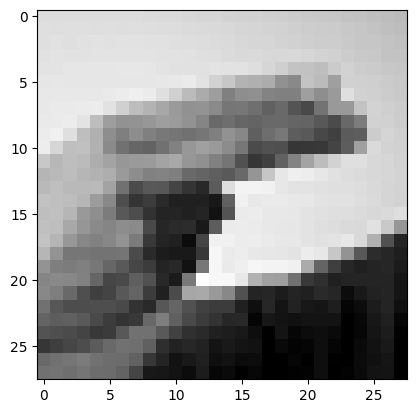

In [15]:
rnd_idx = np.random.randint(len(y_test))
print(f'This picture represent a: {y_test[rnd_idx]}')

# Reshape the flattened image to its original shape (e.g., 28x28)
image = x_test[rnd_idx].reshape((28, 28))

# Plot the image
plt.imshow(image, cmap='gray')
plt.show()

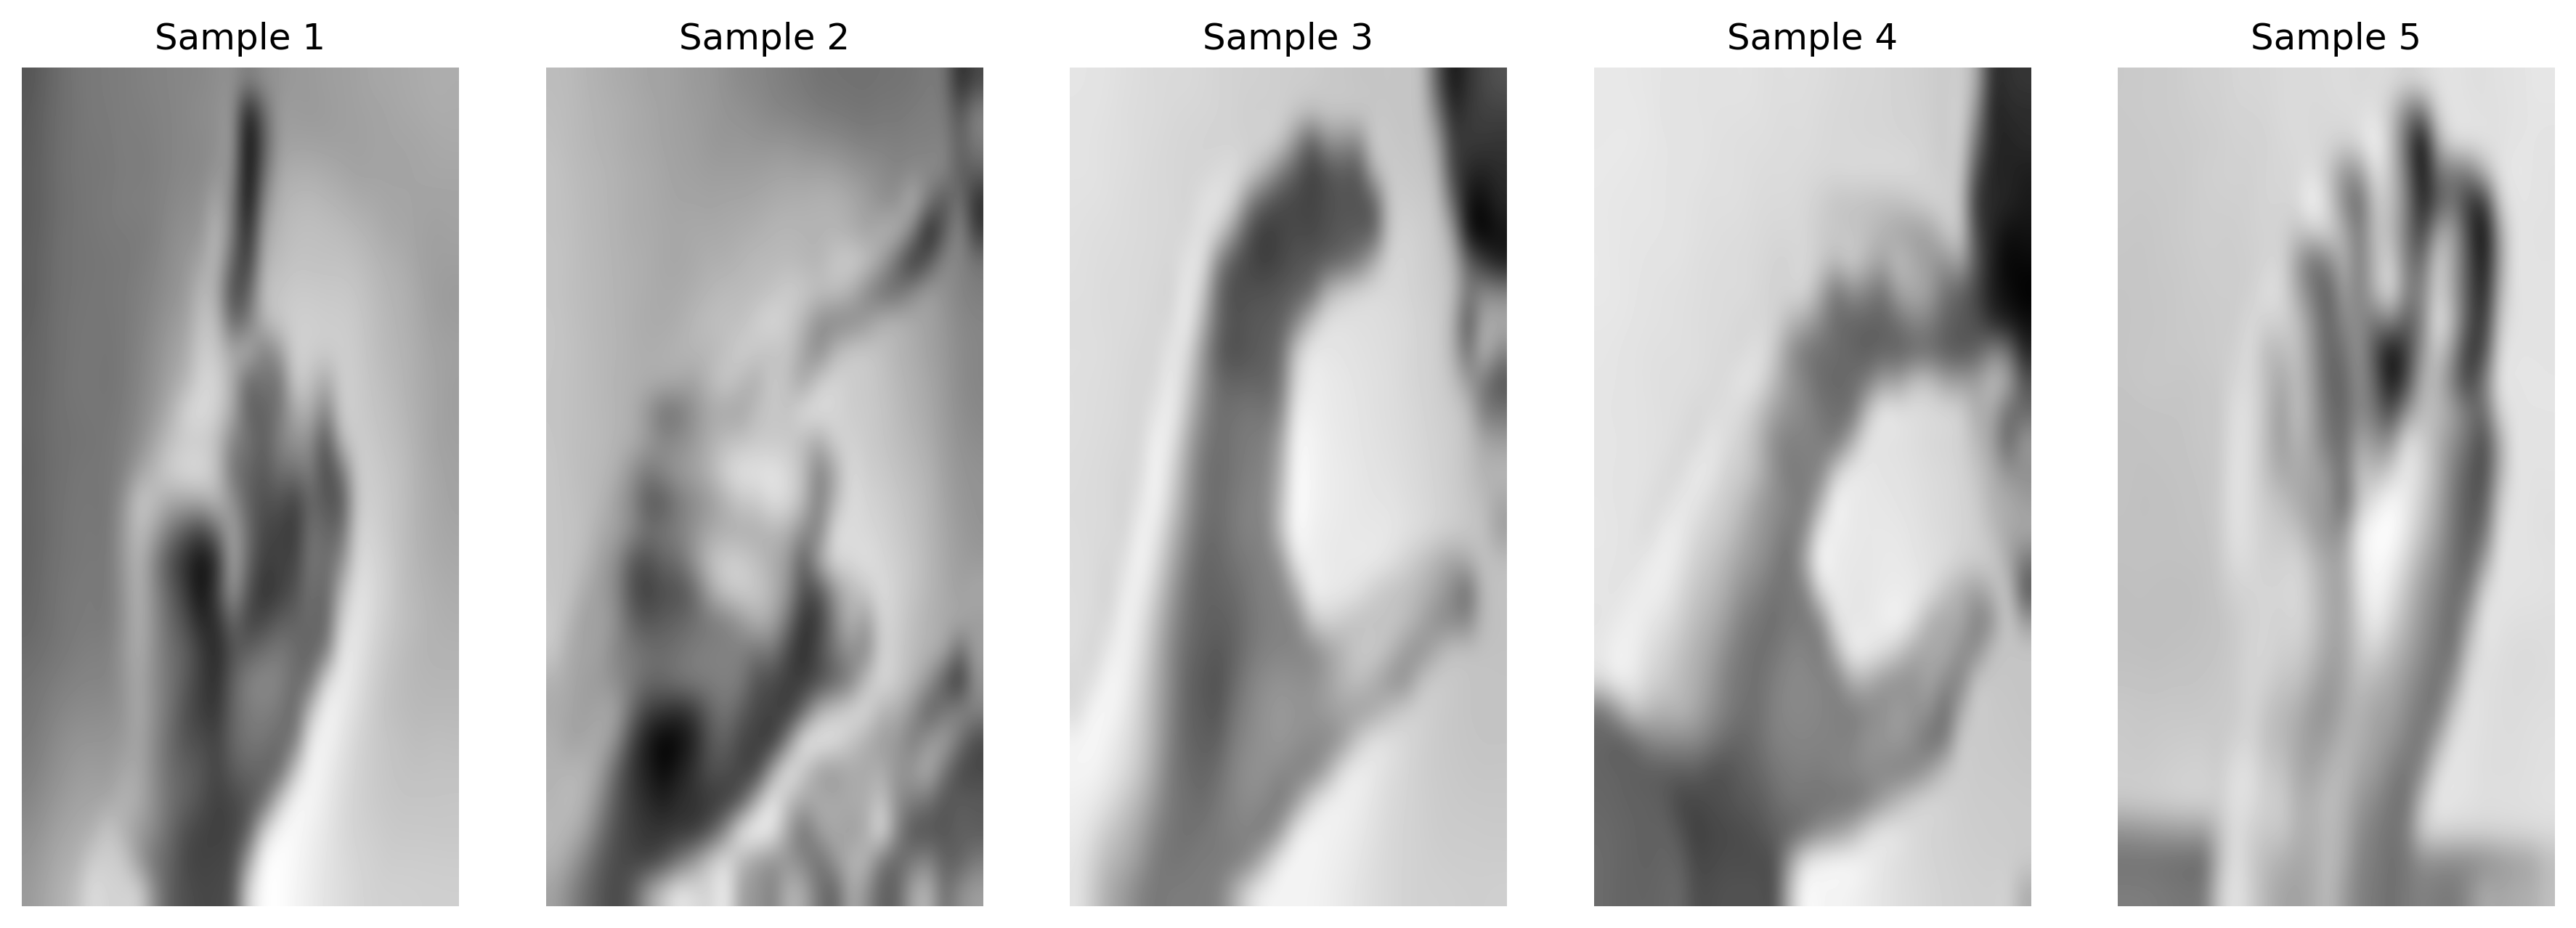

In [16]:
#Select the first 5 samples to graph
num_samples_to_display = 5
selected_samples = x_train_normalized[:num_samples_to_display]

# Reshape
#Change to the actual shape of ASL dataset
image_shape = (28, 28)
selected_samples = selected_samples.reshape(-1, *image_shape)

# Create a subplot to display the samples
# Increase DPI
fig, axes = plt.subplots(1, num_samples_to_display, figsize=(15, 5), dpi=300)

# Display each sample as an image with improved aspect ratio, interpolation, and higher DPI
for i in range(num_samples_to_display):
    #improved aspect ratio and interpolation
    axes[i].imshow(selected_samples[i], cmap='gray', aspect='auto', interpolation='bicubic')
    axes[i].set_title(f'Sample {i+1}')
    # Turn off axis labels
    axes[i].axis('off')

# Save the figure with higher DPI
plt.savefig('sample_images.png', dpi=300, bbox_inches='tight')

plt.show()

In [17]:
# Change data and labels to Pytorch tensors
X_train_tensor = torch.Tensor(x_train).view(-1, 1, 28, 28)
y_train_tensor = torch.Tensor(y_train)
X_val_tensor = torch.Tensor(x_val).view(-1, 1, 28, 28)
y_val_tensor = torch.Tensor(y_val)

In [18]:
# aleatory seed for reproductibility
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

# Define transformation to normalize the images and increase the volume of the data
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [19]:
# Define batch size
batch_size = 64
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [20]:
# Define model architecture
class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.relu5 = nn.ReLU()
        self.fc3 = nn.Linear(128, 24)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Define forward pass
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)
        x = x.view(-1, 128 * 3 * 3)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        x = self.relu5(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Create an instance
model = DeepCNN()

# Define CrossEntropyLoss and optimization
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

In [21]:
# Training
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(data)
        #Labels into LongTensor
        loss = criterion(outputs, target.long())
        loss.backward()
        optimizer.step()

        if (batch_idx + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{batch_idx + 1}/{len(train_loader)}], Loss: {loss.item()}')

    # Validation accuracy
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_preds = torch.argmax(val_outputs, dim=1)
        val_acc = accuracy_score(y_val, val_preds)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Accuracy: {val_acc * 100:.2f}%')

print('Training completed')

# Save the trained model
torch.save(model.state_dict(), 'asl_model.pth')

Epoch [1/10], Step [100/429], Loss: 1.5530058145523071
Epoch [1/10], Step [200/429], Loss: 0.7503552436828613
Epoch [1/10], Step [300/429], Loss: 0.3525521159172058
Epoch [1/10], Step [400/429], Loss: 0.07037665694952011
Epoch [1/10], Validation Accuracy: 91.91%
Epoch [2/10], Step [100/429], Loss: 0.07397405803203583
Epoch [2/10], Step [200/429], Loss: 0.0440860278904438
Epoch [2/10], Step [300/429], Loss: 0.04824191704392433
Epoch [2/10], Step [400/429], Loss: 0.13810637593269348
Epoch [2/10], Validation Accuracy: 94.87%
Epoch [3/10], Step [100/429], Loss: 0.02499275840818882
Epoch [3/10], Step [200/429], Loss: 0.016748571768403053
Epoch [3/10], Step [300/429], Loss: 0.03254610672593117
Epoch [3/10], Step [400/429], Loss: 0.005571243353188038
Epoch [3/10], Validation Accuracy: 96.74%
Epoch [4/10], Step [100/429], Loss: 0.002356484765186906
Epoch [4/10], Step [200/429], Loss: 0.04862198233604431
Epoch [4/10], Step [300/429], Loss: 0.06288222968578339
Epoch [4/10], Step [400/429], Loss:

In [22]:
# Load the trained model
loaded_model = DeepCNN()
loaded_model.load_state_dict(torch.load('asl_model.pth'))
# Set the model to evaluation mode
loaded_model.eval()

DeepCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1152, out_features=256, bias=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu5): ReLU()
  (fc3): Linear(in_features=128, out_features=24, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

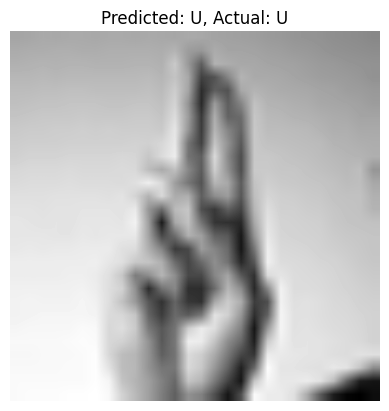

In [23]:
# Select a random index from test set
idx = np.random.randint(len(y_test))

# Get the corresponding image and label from the test set
random_image = x_test[idx]
actual_label = y_test[idx]

# Convert the image to a PyTorch tensor
input_data = torch.tensor(random_image.reshape(1, 1, 28, 28), dtype=torch.float32)

# Set the model to evaluation mode
model.eval()

# Make a prediction using the model
with torch.no_grad():
    output = model(input_data)

# Get the predicted label by finding the index of the maximum output value
predicted_label = output.argmax().item()

# Define a dictionary to map digit labels to their corresponding alphabet characters
alphabet = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'K', 10: 'L',
    11: 'M', 12: 'N', 13: 'O', 14: 'P', 15: 'Q', 16: 'R', 17: 'S', 18: 'T', 19: 'U', 20: 'V',
    21: 'W', 22: 'X', 23: 'Y'
}


# Display the image and labels with 'bilinear' interpolation
plt.imshow(random_image.reshape(28, 28), cmap='gray', interpolation='bilinear')
plt.title(f'Predicted: {alphabet[predicted_label]}, Actual: {alphabet[actual_label]}')
plt.axis('off')

# Save the figure with higher DPI
plt.savefig('sample_image.png', bbox_inches='tight', dpi=300)

plt.show()

In [24]:
# Convert test data to a PyTorch tensor
x_test_tensor = torch.Tensor(x_test)
# Reshape the data for the CNN
x_test_tensor = x_test_tensor.view(-1, 1, 28, 28)

# Make predictions
with torch.no_grad():
    model.eval()
    predictions = model(x_test_tensor)

# Convert predictions to labels
predicted_labels = torch.argmax(predictions, dim=1).numpy()

# Calculate accuracy
correct_predictions = (predicted_labels == y_test).sum()
total_samples = len(y_test)
accuracy = correct_predictions / total_samples

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 96.40%


#**Comparative Analysis**

#NumPy Implementation (Activity 1b)

* The original implementation used NumPy for data manipulation and matrix operations.
* Data preprocessing, including normalization, was manually implemented using NumPy.
* The model architecture was defined using custom NumPy code.
* Model training and optimization were performed manually using custom code.
* The model was evaluated using NumPy operations and custom functions.
* Overall accuracy was calculated using NumPy.


#PyTorch Implementation (Current code)
* The current implementation transitions to PyTorch, a deep learning framework designed for ease of use and flexibility.
* Data preprocessing, including normalization, was simplified using PyTorch's built-in functions.
* The model architecture was defined using PyTorch's nn.Module, making it more concise and readable.
* Model training and optimization were streamlined using PyTorch's predefined loss functions and optimizers.
* Model evaluation was simplified using PyTorch's evaluation mode and functions like torch.no_grad().
* Overall accuracy was calculated using PyTorch.

#Comparative Analysis Summary

The transition from NumPy to PyTorch in the current code brings several advantages:

* Improved code readability and maintainability due to PyTorch's high-level abstractions.
* Simplified data preprocessing using built-in functions.
* Streamlined model training and evaluation processes.
* Utilization of PyTorch's GPU acceleration for faster training (if available).
* Easier model loading and inference.


Overall, the PyTorch implementation offers a more efficient and user-friendly way to work with deep learning models, reducing the need for manual coding and enhancing the model development process.